In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
df['Embarked']=df['Embarked'].fillna('S')#substitute missing values in embarked with 'S'

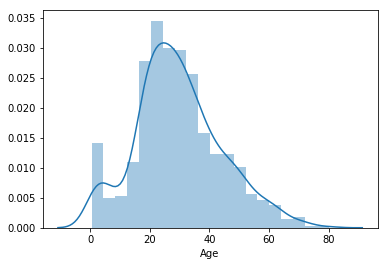

In [7]:
sns.distplot(df[df['Age'].notnull()]['Age'])

In [8]:
df['Age']=df['Age'].interpolate()

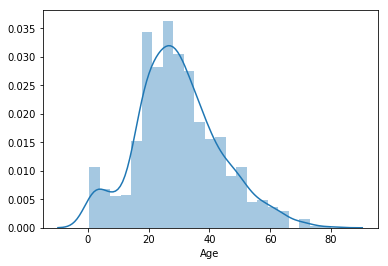

In [9]:
sns.distplot(df[df['Age'].notnull()]['Age'])

In [10]:
df=df.drop('Cabin',axis=1) #this command dropped the cabin column
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
df=df.drop(['PassengerId','Name','Ticket'],axis=1)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


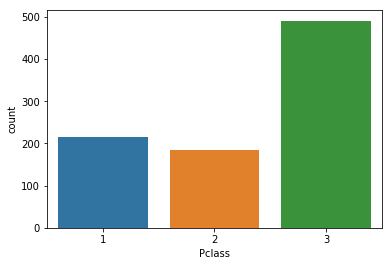

In [13]:
sns.countplot(x='Pclass',data=df)

In [14]:
df['is_child']=df['Age'].apply(lambda x: 1 if x<=15 else 0)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_child
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,0


In [16]:
df['family']=df['SibSp']+df['Parch']

In [17]:
df['is_alone']=df['family'].apply(lambda x: 1 if x==0 else 0)

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_child,family,is_alone
0,0,3,male,22.0,1,0,7.2500,S,0,1,0
1,1,1,female,38.0,1,0,71.2833,C,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,0,1


In [19]:
df['is_female']=df['Sex'].apply(lambda x:1 if x=='female' else 0) # categorizing Sex data into numbers - 0 and 1 :1 
                                                                  #for female o for male
df = df.drop('Sex', axis =1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,is_child,family,is_alone,is_female
0,0,3,22.0,1,0,7.2500,S,0,1,0,0
1,1,1,38.0,1,0,71.2833,C,0,1,0,1
2,1,3,26.0,0,0,7.9250,S,0,0,1,1
3,1,1,35.0,1,0,53.1000,S,0,1,0,1
4,0,3,35.0,0,0,8.0500,S,0,0,1,0


In [20]:
df=pd.get_dummies(df,prefix=['is'])

In [21]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,is_child,family,is_alone,is_female,is_C,is_Q,is_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,0,0,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null float64
is_child     891 non-null int64
family       891 non-null int64
is_alone     891 non-null int64
is_female    891 non-null int64
is_C         891 non-null uint8
is_Q         891 non-null uint8
is_S         891 non-null uint8
dtypes: float64(2), int64(8), uint8(3)
memory usage: 72.3 KB


In [23]:
x, y = df.drop(['Survived'], axis=1),df['Survived']

In [24]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,is_child,family,is_alone,is_female,is_C,is_Q,is_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,1,1,0,0
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,1
3,1,35.0,1,0,53.1000,0,1,0,1,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,0,1


In [25]:
train_X,test_X,train_Y,test_Y = train_test_split(x,y,train_size=0.80,test_size=0.20,stratify =y)

In [26]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [27]:
len(train_X)

712

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null float64
is_child     891 non-null int64
family       891 non-null int64
is_alone     891 non-null int64
is_female    891 non-null int64
is_C         891 non-null uint8
is_Q         891 non-null uint8
is_S         891 non-null uint8
dtypes: float64(2), int64(8), uint8(3)
memory usage: 72.3 KB


In [29]:
clfRF= RandomForestClassifier(n_estimators=50, class_weight='balanced',max_depth=2)
clfRF.fit(train_X, train_Y)
y_pred_rad_for=clfRF.predict(test_X) ##71.51%
acc_rad_for=round(clfRF.score(test_X, test_Y)*100,2)
print(str(acc_rad_for)+' percent')

75.42 percent


In [30]:
clf1=LogisticRegression()
clf1.fit(train_X,train_Y)  #it is showing that machine is predicting 79.33%accurately after learning data from train_X and train_Y
y_pred_log_reg=clf1.predict(test_X)
acc_log_reg=round(clf1.score(test_X,test_Y)*100,2)
print(str(acc_log_reg)+' percent')

77.09 percent


In [31]:
clf2 = GradientBoostingClassifier(learning_rate=0.1)
clf2.fit(train_X, train_Y)
y_pred_random_forest = clf2.predict(test_X)### 77.65%
acc_random_forest = round(clf2.score(test_X, test_Y) * 100, 2)
print (acc_random_forest)

79.89


In [32]:
df_test=pd.read_csv('test.csv')

In [33]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
df_test=df_test.drop(['PassengerId','Ticket', 'Name', 'Cabin'], axis=1)
df_test['Embarked'].value_counts() 
df_test['Embarked']= df_test['Embarked'].fillna('S')
df_test['Age']=df_test['Age'].interpolate()
df_test['Family']= df_test['SibSp'] + df_test['Parch']
df_test['Alone']= df_test['Family'].apply(lambda x: 1 if x==0 else 0)
df_test['is_female']=df_test['Sex'].apply(lambda x: 1 if x=='female' else 0)
df_test['is_child']=df['Age'].apply(lambda x: 1 if x<=15 else 0)
df_test=df_test.drop('Sex', axis=1)
df_test.head()
df_test=pd.get_dummies(df_test,prefix=['is']) 

In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Pclass       418 non-null int64
Age          418 non-null float64
SibSp        418 non-null int64
Parch        418 non-null int64
Fare         417 non-null float64
Family       418 non-null int64
Alone        418 non-null int64
is_female    418 non-null int64
is_child     418 non-null int64
is_C         418 non-null uint8
is_Q         418 non-null uint8
is_S         418 non-null uint8
dtypes: float64(2), int64(7), uint8(3)
memory usage: 30.7 KB


In [36]:
df_test['Fare']=df_test['Fare'].fillna(df['Fare'].mean())

In [38]:
x_testset=df_test
x_testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Pclass       418 non-null int64
Age          418 non-null float64
SibSp        418 non-null int64
Parch        418 non-null int64
Fare         418 non-null float64
Family       418 non-null int64
Alone        418 non-null int64
is_female    418 non-null int64
is_child     418 non-null int64
is_C         418 non-null uint8
is_Q         418 non-null uint8
is_S         418 non-null uint8
dtypes: float64(2), int64(7), uint8(3)
memory usage: 30.7 KB


In [41]:
y_pred_rad_for=clf2.predict(x_testset) ## since in my case most accurate is GradientBoostingClassifier with 79.89% I am using it.

In [42]:
test=pd.read_csv('test.csv')
predict= pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": y_pred_rad_for
    
})

predict.to_csv('predictions.csv', index=False)